# Auto Sales Data Set

##### This Data contains  Sales data of an Automobile companies as uptained by Kaggle.com for public consumption.
<-- https://www.kaggle.com/datasets/ddosad/auto-sales-data/data -->


In [6]:
'''
ORDERNUMBER	- unique identification number assigned to each order.
QUANTITYORDERED	- number of items ordered in each order.
PRICEEACH - price of each item in the order.
ORDERLINENUMBER	- line number of each item within an order.
SALES - total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.
ORDERDATEIt - denotes the date on which the order was placed.
DAYS_SINCE_LASTORDER - number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.
STATUS - status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."
PRODUCTLINE	- This column specifies the product line categories to which each item belongs.
MSRP - Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.
PRODUCTCODE	- This column represents the unique code assigned to each product.
CITY - city where the customer is located.
POSTALCODE - ZIP code associated with the customer's address.
COUNTRY	-  where the customer is located.
DEALSIZE - size of the deal or order, which are the categories "Small," "Medium," or "Large.

non-anonymized columsn to be removed on later steps:
CUSTOMERNAME - It denotes the name of the customer who placed the order.
PHONE - contact phone number for the customer.
ADDRESSLINE1 - customer's address.
CONTACTLASTNAME	- contact person associated with the customer.
CONTACTFIRSTNAME - first name of the contact person associated with the customer.
'''

'\nORDERNUMBER\t- unique identification number assigned to each order.\nQUANTITYORDERED\t- number of items ordered in each order.\nPRICEEACH - price of each item in the order.\nORDERLINENUMBER\t- line number of each item within an order.\nSALES - total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.\nORDERDATEIt - denotes the date on which the order was placed.\nDAYS_SINCE_LASTORDER - number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.\nSTATUS - status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."\nPRODUCTLINE\t- This column specifies the product line categories to which each item belongs.\nMSRP - Manufacturer\'s Suggested Retail Price and represents the suggested selling price for each item.\nPRODUCTCODE\t- This column represents the unique code assigned to each product.\nCITY - city where the cu

In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

# Filter out UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

In [8]:
path = 'C:\\Users\\rinde\\OneDrive\\Career Foundry\\Auto Sales data.csv'



In [9]:
# Read the CSV file into a DataFrame
df = pd.read_csv(path)

In [10]:
# checking the Shape of my data. 2747 Row and 20 Columns
df.shape

(2747, 23)

In [11]:
'''
Checked for Nulls and validate for non-anonymized columns.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   ORDERDATE.1           2747 non-null   int64  
 7   ORDERDATE_AMER        2747 non-null   object 
 8   MONTH_YEAR            2747 non-null   object 
 9   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 10  STATUS                2747 non-null   object 
 11  PRODUCTLINE           2747 non-null   object 
 12  MSRP                  2747 non-null   int64  
 13  PRODUCTCODE           2747 non-null   object 
 14  CUSTOMERNAME          2747 non-null   object 
 15  PHONE                

In [12]:
'''
There aren't any Nulls, however I will remove non anonymized columns:
columns customername, phone, addressline1, contactlastname, contactfirstname.
'''
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'ORDERDATE.1', 'ORDERDATE_AMER', 'MONTH_YEAR',
       'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE',
       'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [13]:
# Droped non anonymized columns and assiged it to Auto_Sales_df
Auto_Sales_df = df.drop(['CUSTOMERNAME','PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1)


In [14]:
Auto_Sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,ORDERDATE_AMER,MONTH_YEAR,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,24,2/24/2018,Feb-18,828,Shipped,Motorcycles,95,S10_1678,NYC,10022,USA,Small
1,10121,34,81.35,5,2765.90,7/5/2018,7,5/7/2018,May-18,757,Shipped,Motorcycles,95,S10_1678,Reims,51100,France,Small
2,10134,41,94.74,2,3884.34,1/7/2018,1,7/1/2018,Jul-18,703,Shipped,Motorcycles,95,S10_1678,Paris,75508,France,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,25,8/25/2018,Aug-18,649,Shipped,Motorcycles,95,S10_1678,Pasadena,90003,USA,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,28,10/28/2018,Oct-18,586,Shipped,Motorcycles,95,S10_1678,Burlingame,94217,USA,Medium


In [15]:
# Checked for duplicates. There are no duplicates.
Auto_Sales_df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2742    False
2743    False
2744    False
2745    False
2746    False
Length: 2747, dtype: bool

In [16]:
Auto_Sales_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE.1,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,14.306880,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,8.833086,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,6.000000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,14.000000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,21.000000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,31.000000,3562.000000,214.000000


In [17]:
Auto_Sales_df['ORDERDATE_AMER']= pd.to_datetime(Auto_Sales_df['ORDERDATE_AMER'])

In [18]:
# Extract Year from ORDERDATE_AMER
Auto_Sales_df['Year']=Auto_Sales_df['ORDERDATE_AMER'].dt.year

In [19]:
pivot_ProductbYear = pd.pivot_table(Auto_Sales_df, index='Year', columns='PRODUCTLINE', values='SALES', aggfunc='sum')


In [20]:
pivot_ProductbYear

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
Year,,,,,,,
2018,1435572.13,308019.43,272257.60,244821.09,72802.29,420429.93,599111.59
2019,1754056.17,560545.23,496991.65,335692.62,116523.85,522429.94,883685.10
2020,653240.24,234947.53,200074.17,119525.51,36917.33,168699.32,323878.99


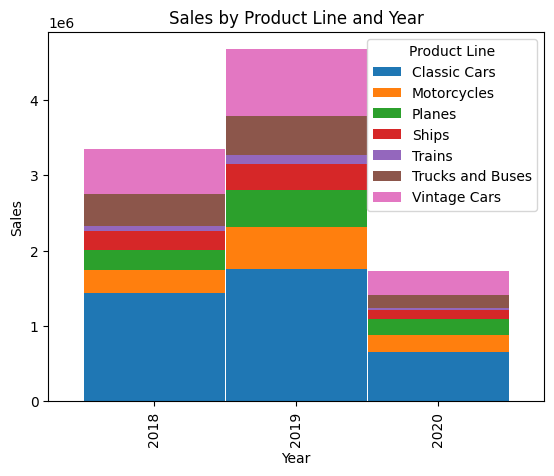

In [21]:
bar_width=0.994
pivot_ProductbYear.plot(kind='bar', stacked=True, width=bar_width)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales by Product Line and Year')
plt.legend(title='Product Line')
plt.show()




In [73]:
sorted_df = Auto_Sales_df.sort_values(by='PRICEEACH', ascending=False)
sorted_df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,ORDERDATE_AMER,MONTH_YEAR,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE,Year
1507,10391,33,252.87,8,8344.71,9/3/2020,9,2020-03-09,Mar-20,1591,Shipped,Vintage Cars,33,S24_1937,North Sydney,2060,Australia,Large,2020
714,10322,50,250.73,6,12536.50,4/11/2019,4,2019-11-04,Nov-19,924,Shipped,Vintage Cars,127,S18_2325,Nashua,62005,USA,Large,2019
25,10112,29,248.59,1,7209.11,24/03/2018,24,2018-03-24,Mar-18,825,Shipped,Classic Cars,214,S10_1949,Lule,S-958 22,Sweden,Large,2018
176,10127,46,245.20,2,11279.20,3/6/2018,3,2018-06-03,Jun-18,905,Shipped,Classic Cars,207,S12_1108,NYC,10022,USA,Large,2018
178,10153,20,245.20,11,4904.00,28/09/2018,28,2018-09-28,Sep-18,790,Shipped,Classic Cars,207,S12_1108,Madrid,28034,Spain,Medium,2018


# Correlation Heat Map

In [39]:
# Creating a dataframe for columns with numerical values.
auto_sales_num = Auto_Sales_df.select_dtypes(include='number')


### Heat Map Visualization using Matplotlib and Seasborn together. 
### As the colors turned from blue to red the correlation is getting stronger.
### e.g. ORDERNUMBER and Year
### note that the diagnal boxes with 1s means is due to same variable being compared to each other.

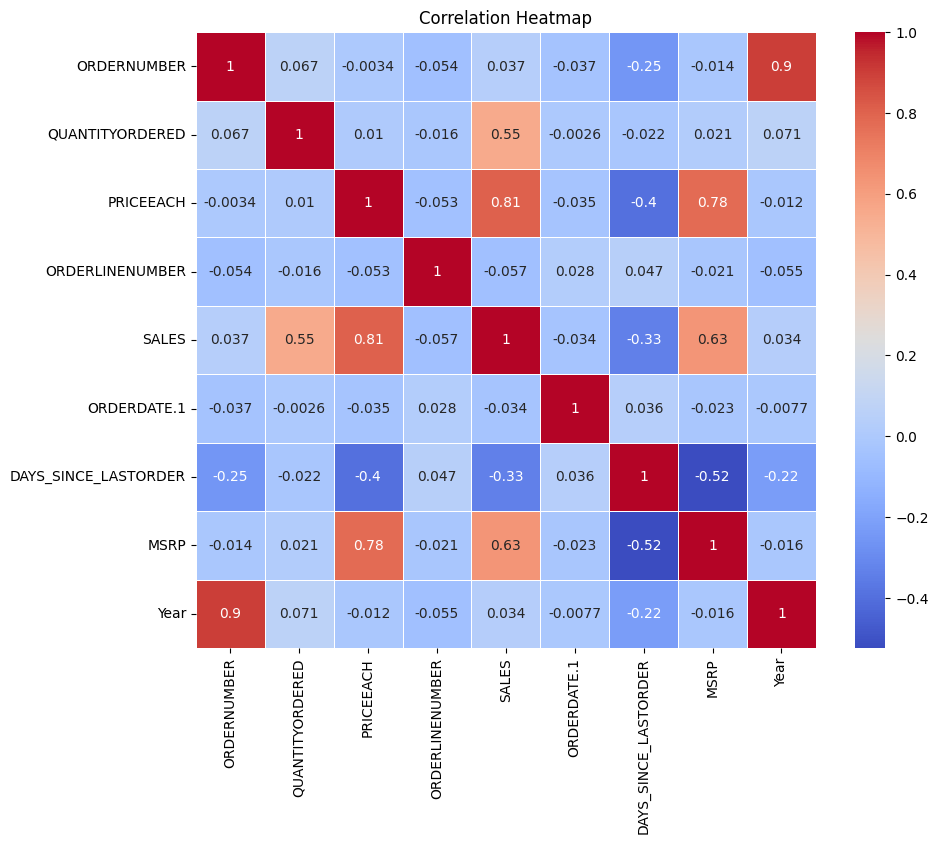

In [38]:


# Calculate the correlation matrix
correlation_matrix = auto_sales_num.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)  # Create heatmap
plt.title('Correlation Heatmap')  # Add a title
plt.show()  # Display the heatmap

### As you could see in the scatterplot below as sales increase so does the price per item. 

C:\Users\rinde\AppData\Local\Temp\ipykernel_15648\2637922108.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['SALES'], cmap='coolwarm')


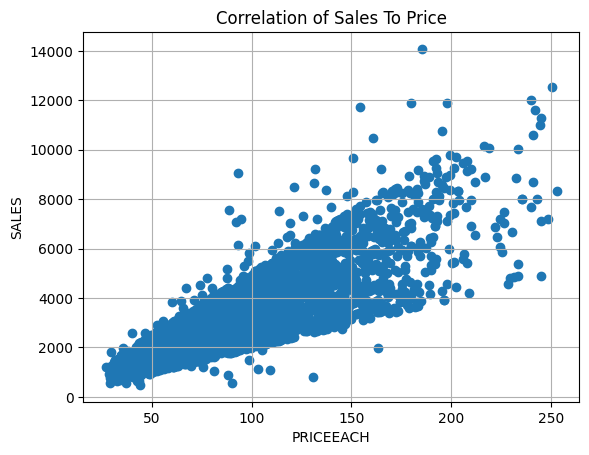

In [72]:
plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['SALES'], cmap='coolwarm')

# Add labels and title
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.title('Correlation of Sales To Price')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### At the end of each year the order # continues on to the next year. 
### Nothing unsual about this scatterplot other then showing you the continuation of the order #s from year to year.

C:\Users\rinde\AppData\Local\Temp\ipykernel_15648\2249976116.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(auto_sales_num['ORDERNUMBER'], auto_sales_num['Year'], cmap='coolwarm')


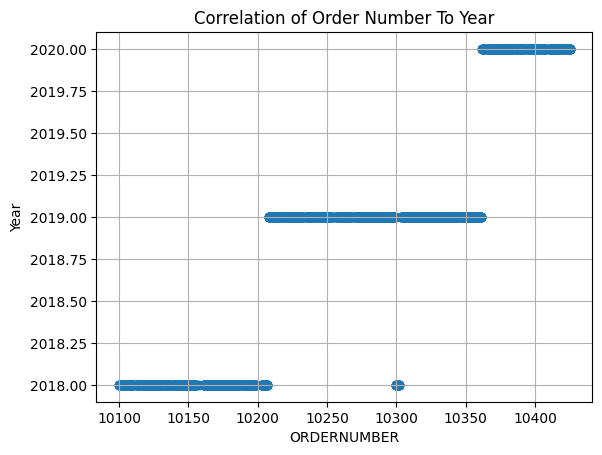

In [70]:
# Create the scatter plot
plt.scatter(auto_sales_num['ORDERNUMBER'], auto_sales_num['Year'], cmap='coolwarm')

# Add labels and title
plt.xlabel('ORDERNUMBER')
plt.ylabel('Year')
plt.title('Correlation of Order Number To Year')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### There is some correlation between increase sales to Order Quantity 
### However, the quantity order around 50 has a very wide sales range. 
### This shows most costumers are buying around quantity of 50.

C:\Users\rinde\AppData\Local\Temp\ipykernel_15648\2399021094.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(auto_sales_num['QUANTITYORDERED'], auto_sales_num['SALES'], cmap='coolwarm')


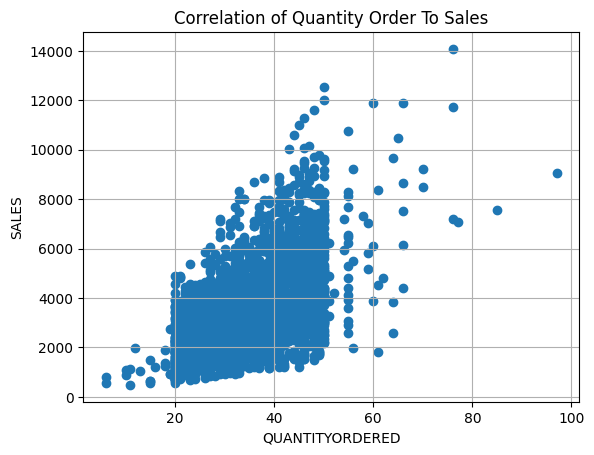

In [68]:
# Create the scatter plot
#plt.scatter(correlation_matrix['ORDERNUMBER'], correlation_matrix['Year'], cmap='coolwarm')
plt.scatter(auto_sales_num['QUANTITYORDERED'], auto_sales_num['SALES'], cmap='coolwarm')

# Add labels and title
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.title('Correlation of Quantity Order To Sales')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### Strong Correlation between the Manfacture Suggested Retail Price and Selling Price suggesting that the items are selling close to Manfacture Suggested Retail Price.
### The scatter points is an opportunity to adjust the pricing. 


C:\Users\rinde\AppData\Local\Temp\ipykernel_15648\4079561706.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['MSRP'], cmap='coolwarm')


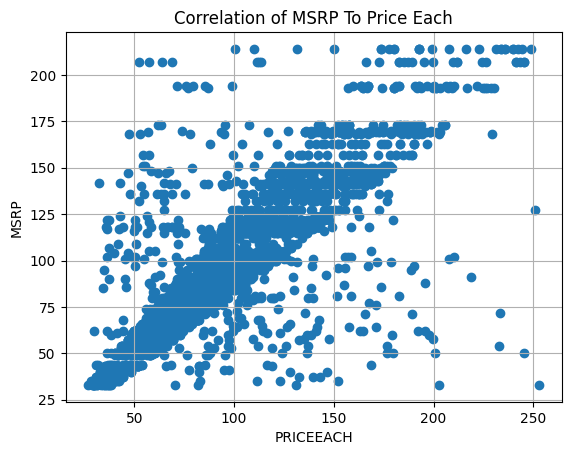

In [67]:
plt.scatter(auto_sales_num['PRICEEACH'], auto_sales_num['MSRP'], cmap='coolwarm')

# Add labels and title
plt.xlabel('PRICEEACH')
plt.ylabel('MSRP')
plt.title('Correlation of MSRP To Price Each')

# Customize the grid
plt.grid(True)

# Show the plot
plt.show()

### Using seaborn pairplot to explore insights.
### Year and Quantity ordered looks interesting because 2020 has a wide range compared to 2018-2019.
### Order number to price each looks interesting because price each goes from dense to scattered based on order quantity. 

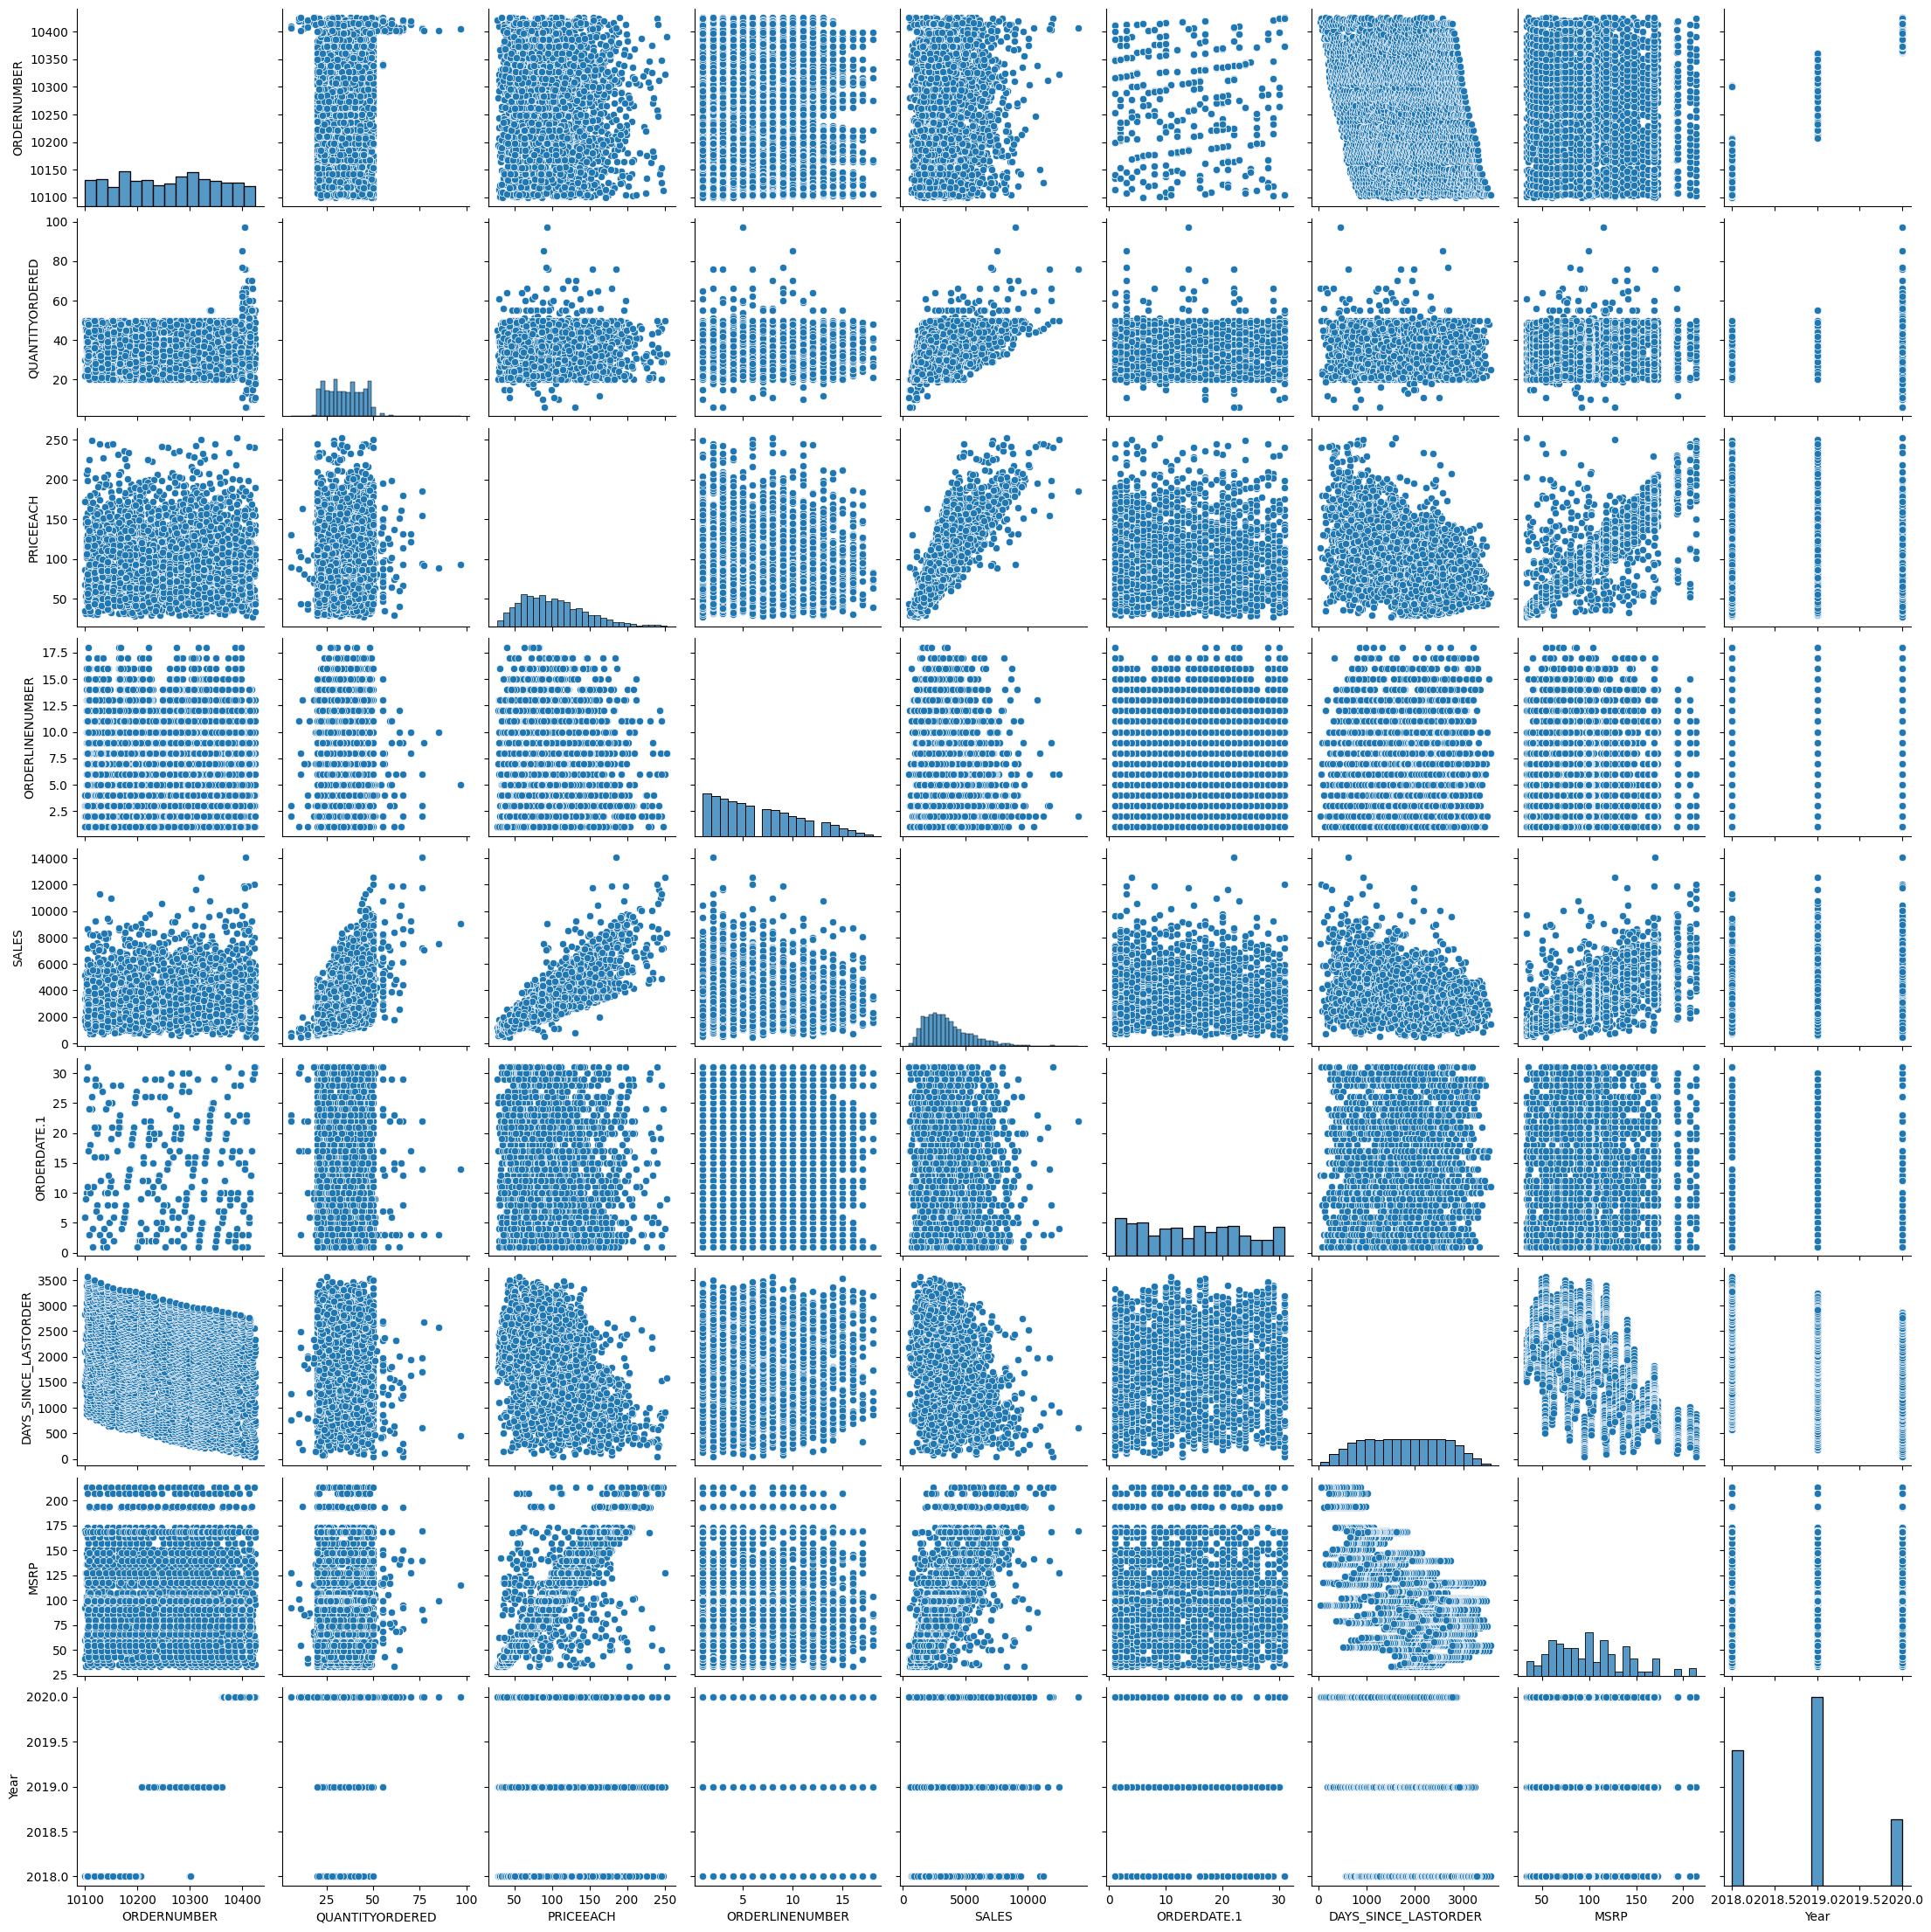

In [74]:
# Create the pair plot
sns.pairplot(auto_sales_num)

# Display the plot
plt.show()

### Using seaborn catplot show relationship between quantity order and year.
### 2018-2019 had little change in quantity order as compared to 2020. 
### 2020 had wider range of quantity orders and also lower min and high max of quantities
### as compared to 2018-2019.

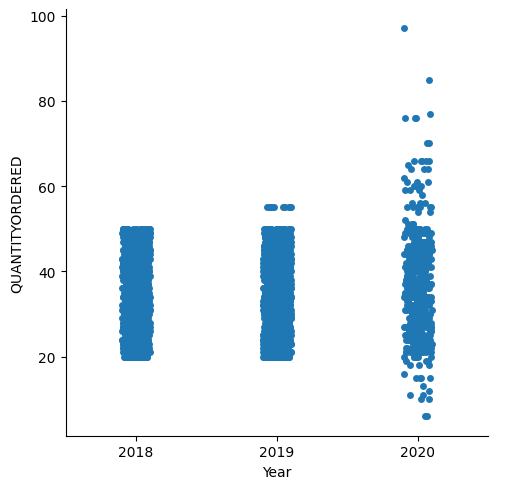

In [98]:
# Create a swarm plot
sns.catplot(x = auto_sales_num['Year'], y = auto_sales_num['QUANTITYORDERED'],data = auto_sales_num)
plt.show()

### Now relationship between Order number and price of each item. 


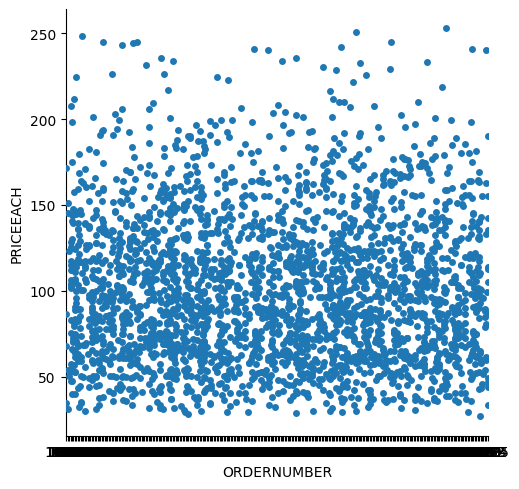

In [95]:
# Create a swarm plot
sns.catplot(x = auto_sales_num['ORDERNUMBER'], y = auto_sales_num['PRICEEACH'],data = auto_sales_num)
plt.show()

In [113]:
pivot_City = pd.pivot_table(Auto_Sales_df, index='CITY', columns='PRODUCTLINE', values='SALES', aggfunc='sum')

# Calculate the total sales for each city and add it as a new column
pivot_City['Total Sales'] = pivot_City.sum(axis=1)
pivot_City.head()


PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Total Sales
CITY,,,,,,,,
Aaarhus,79375.64,NaN,NaN,1753.06,7146.23,9588.82,2731.80,100595.55
Allentown,36144.20,33805.30,10235.43,NaN,5351.61,27800.52,8801.08,122138.14
Barcelona,5324.40,10881.75,16179.15,28254.46,NaN,NaN,17772.10,78411.86
Bergamo,5535.25,NaN,67756.64,10754.92,NaN,NaN,53908.91,137955.72
Bergen,60795.84,30524.29,3957.05,NaN,NaN,NaN,16363.10,111640.28


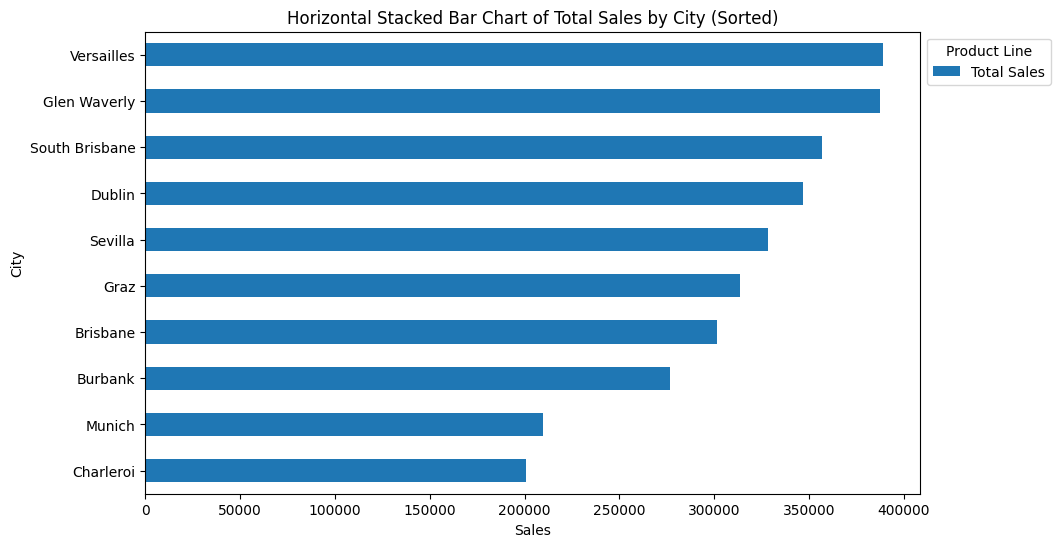

In [133]:
# Create the pivot table
# pivot_City = pd.pivot_table(Auto_Sales_df, index='CITY', columns='PRODUCTLINE', values='SALES', aggfunc='sum')

# Calculate the total sales for each city and add it as a new column
pivot_City['Total Sales'] = pivot_City.sum(axis=1)

# Sort the pivot table by 'Total Sales' column in descending order
pivot_City_sorted = pivot_City.sort_values(by='Total Sales', ascending=True)
# Limit to top 10 cities
pivot_City_top10 = pivot_City_sorted.head(10)
# Plotting the horizontal stacked bar chart with sorted data
pivot_City_top10[['Total Sales']].plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Sales')
plt.ylabel('City')
plt.title('Horizontal Stacked Bar Chart of Total Sales by City (Sorted)')
plt.legend(title='Product Line', bbox_to_anchor=(1, 1))
plt.show()

In [117]:
# # Calculate the correlation matrix
# pivot_City_matrix = pivot_City.corr()

# # Create the heatmap
# plt.figure(figsize=(10, 8))  # Set the figure size
# sns.heatmap(pivot_City_matrix, annot=True, cmap='coolwarm', linewidths=.5)  # Create heatmap
# plt.title('Correlation Heatmap')  # Add a title
# plt.show()  # Display the heatmap

In [118]:
# # Create the pair plot
# sns.pairplot(pivot_City_matrix)

# # Display the plot
# plt.show()

In [134]:
# you can delete after figuring out ow to add the new MARGIN column
auto_sales_num.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE.1,DAYS_SINCE_LASTORDER,MSRP,Year
0,10107,30,95.70,2,2871.00,24,828,95,2018
1,10121,34,81.35,5,2765.90,7,757,95,2018
2,10134,41,94.74,2,3884.34,1,703,95,2018
3,10145,45,83.26,6,3746.70,25,649,95,2018
4,10168,36,96.66,1,3479.76,28,586,95,2018


### NEW COLUMN
# PRICEEACH - MSRP = MARGIN
# NEW COLUMN NAMES HOULD BE MARGIN
# use auto_sales_num dataset to add this new column to.  assing a new variable to it and call it auto_sales_margin


In [138]:
# Adding a new column as the sum of column1 and column2
Auto_Sales_df['MARGIN'] = Auto_Sales_df['PRICEEACH'] - Auto_Sales_df['MSRP']

Auto_Sales_df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,ORDERDATE.1,ORDERDATE_AMER,MONTH_YEAR,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,POSTALCODE,COUNTRY,DEALSIZE,Year,MARGIN
0,10107,30,95.70,2,2871.00,24/02/2018,24,2018-02-24,Feb-18,828,Shipped,Motorcycles,95,S10_1678,NYC,10022,USA,Small,2018,0.70
1,10121,34,81.35,5,2765.90,7/5/2018,7,2018-05-07,May-18,757,Shipped,Motorcycles,95,S10_1678,Reims,51100,France,Small,2018,-13.65
2,10134,41,94.74,2,3884.34,1/7/2018,1,2018-07-01,Jul-18,703,Shipped,Motorcycles,95,S10_1678,Paris,75508,France,Medium,2018,-0.26
3,10145,45,83.26,6,3746.70,25/08/2018,25,2018-08-25,Aug-18,649,Shipped,Motorcycles,95,S10_1678,Pasadena,90003,USA,Medium,2018,-11.74
4,10168,36,96.66,1,3479.76,28/10/2018,28,2018-10-28,Oct-18,586,Shipped,Motorcycles,95,S10_1678,Burlingame,94217,USA,Medium,2018,1.66


In [153]:
# pivot_margin = Auto_Sales_df.pivot_table(Auto_Sales_df, index='PRODUCTLINE', values='SALES', aggfunc='sum')
pivot_margin = Auto_Sales_df.pivot_table(index='PRODUCTLINE', values=['MARGIN', 'SALES'], aggfunc='sum')


In [154]:
pivot_margin.tail()

,MARGIN,SALES
PRODUCTLINE,,
Planes,471.42,969323.42
Ships,508.93,700039.22
Trains,856.37,226243.47
Trucks and Buses,567.77,1111559.19
Vintage Cars,2049.52,1806675.68


### Which city has the largest selling product? Versailles
### Which product line has the highest product margin? Vintage Cars
### What is the forecasting for future sells? I have to use tableau to figure it out. 


# New Question
### Why does 2020 have a wider range of order quantity?
### How does price effect sales? 
### How does MSRP hold up against actual selling price?
### How does quantity order effect sales?

### Hypthothsi: If the sales from 2018-2019 significantly increase then why did sales significantly decreased in 2020?